## Linear regresion stochastistic gradient descent verification

In [1]:
# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
# to make this notebook's output stable across runs
import numpy as np
np.random.seed(42)

## the ideal  model is y=4+3x

In [3]:
X=2*np.random.rand(100,1)
y=4 + 3*X + np.random.randn(100,1)
print(X.shape)
print(y.shape)

(100, 1)
(100, 1)


In [4]:
X.ndim

2

In [5]:
y.ndim

2

In [6]:
type(X)

numpy.ndarray

In [7]:
type(y)

numpy.ndarray

### X , y : column vector

In [8]:
X[:5]

array([[0.74908024],
       [1.90142861],
       [1.46398788],
       [1.19731697],
       [0.31203728]])

In [9]:
y[:5]

array([[6.33428778],
       [9.40527849],
       [8.48372443],
       [5.60438199],
       [4.71643995]])

In [10]:
data=np.hstack((X,y))

In [11]:
print(type(data))

<class 'numpy.ndarray'>


In [12]:
data.ndim

2

In [13]:
print(data[:5])

[[0.74908024 6.33428778]
 [1.90142861 9.40527849]
 [1.46398788 8.48372443]
 [1.19731697 5.60438199]
 [0.31203728 4.71643995]]


## Let's see the input versus output

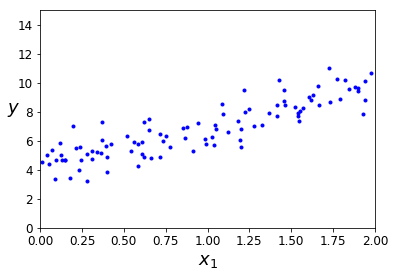

In [14]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [15]:
print(data[:5])

[[0.74908024 6.33428778]
 [1.90142861 9.40527849]
 [1.46398788 8.48372443]
 [1.19731697 5.60438199]
 [0.31203728 4.71643995]]


In [16]:
np.size(data)

200

In [17]:
n_samples=np.size(data,0)
print(n_samples)

100


In [18]:
np.size(data,1)

2

###  Step 1: create placeholders for X (birth rate) and Y (life expectancy)

In [19]:
import tensorflow as tf
Xi = tf.placeholder(tf.float32, name='X')
Yo = tf.placeholder(tf.float32, name='Y')

### Step 2: create weight and bias, initialized to 0

In [20]:
w = tf.get_variable('weights', initializer=tf.constant(0.0))
b = tf.get_variable('bias', initializer=tf.constant(0.0))

Instructions for updating:
Colocations handled automatically by placer.


In [21]:
Y_predicted = w * Xi + b 

### note the 0.5 in the loss term

In [22]:
loss = 0.5*tf.square(Yo - Y_predicted, name='loss')

In [23]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

In [24]:
db=(Y_predicted - Yo)*1

In [25]:
dw=(Y_predicted - Yo)*Xi

In [26]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) 
    #  train the model for 20 epochs
    for i in range(1):
        total_loss = 0
        count=0
        for xq,yq in data:
            print(xq,yq)
            w_,b_=sess.run([w, b])
            print('[w,b]=',w_,b_)
            dw_,db_=sess.run([dw,db], feed_dict={Xi: xq, Yo:yq})
            print('[dw,db]=',dw_,db_)
            print('[w-alpha*dw,b+alpha*db]=',w_-0.001*dw_,b_-0.001*db_)
            _, l = sess.run([optimizer, loss], feed_dict={Xi: xq, Yo:yq})
            print('loss=',l)
            total_loss += l
            count=count+1
            print(' ')
        w_out, b_out = sess.run([w, b])
        #print('Epoch {0}: {1}'.format(i, total_loss/n_samples))
        print("count=",count)
        #print(w_out, b_out)
        print(" ")

0.749080237694725 6.334287781322345
[w,b]= 0.0 0.0
[dw,db]= -4.7448897 -6.3342876
[w-alpha*dw,b+alpha*db]= 0.004744889736175538 0.006334287643432617
loss= 20.0616
 
1.9014286128198323 9.40527848799363
[w,b]= 0.00474489 0.006334288
[dw,db]= -17.854267 -9.389922
[w-alpha*dw,b+alpha*db]= 0.0225991572663188 0.015724210187792777
loss= 44.08532
 
1.4639878836228102 8.483724427403931
[w,b]= 0.022599157 0.015724212
[dw,db]= -12.348614 -8.434916
[w-alpha*dw,b+alpha*db]= 0.0349477706849575 0.024159127473831178
loss= 35.5739
 
1.1973169683940732 5.604381990581327
[w,b]= 0.03494777 0.024159128
[dw,db]= -6.6311955 -5.538379
[w-alpha*dw,b+alpha*db]= 0.04157896712422371 0.029697507038712503
loss= 15.3368225
 
0.31203728088487304 4.716439954817107
[w,b]= 0.041578967 0.029697508
[dw,db]= -1.4583899 -4.673768
[w-alpha*dw,b+alpha*db]= 0.043037357002496716 0.034371275663375854
loss= 10.922054
 
0.3119890406724053 5.293079693528962
[w,b]= 0.04303736 0.034371275
[dw,db]= -1.6364702 -5.245281
[w-alpha*dw,b+a

[w,b]= 0.53586483 0.49879473
[dw,db]= -16.607124 -9.620587
[w-alpha*dw,b+alpha*db]= 0.5524719543457032 0.5084153218269348
loss= 46.27785
 
1.2465962536551158 8.213621681877136
[w,b]= 0.55247194 0.50841534
[dw,db]= -8.746739 -7.0164976
[w-alpha*dw,b+alpha*db]= 0.5612186751365662 0.5154318389892578
loss= 24.61562
 
0.6617960497052984 4.794084651913247
[w,b]= 0.5612187 0.5154318
[dw,db]= -2.585796 -3.9072404
[w-alpha*dw,b+alpha*db]= 0.5638044750690461 0.5193390617370606
loss= 7.6332636
 
0.12711670057204727 5.037903710349971
[w,b]= 0.56380445 0.5193391
[dw,db]= -0.56527466 -4.4468956
[w-alpha*dw,b+alpha*db]= 0.5643697223067283 0.5237859802246094
loss= 9.887441
 
0.6219646434313244 4.891212260066652
[w,b]= 0.56436974 0.523786
[dw,db]= -2.498064 -4.0164084
[w-alpha*dw,b+alpha*db]= 0.566867802143097 0.5278024168014527
loss= 8.065768
 
0.6503666440534941 6.738184535902934
[w,b]= 0.5668678 0.5278024
[dw,db]= -3.7992535 -5.84171
[w-alpha*dw,b+alpha*db]= 0.5706670818328857 0.5336441178321838
los

In [28]:
data[:10]

array([[0.74908024, 6.33428778],
       [1.90142861, 9.40527849],
       [1.46398788, 8.48372443],
       [1.19731697, 5.60438199],
       [0.31203728, 4.71643995],
       [0.31198904, 5.29307969],
       [0.11616722, 5.82639572],
       [1.73235229, 8.67878666],
       [1.20223002, 6.79819647],
       [1.41614516, 7.74667842]])